# Lab_Визуализация данных Seaborn_Matplotlib



Визуализацию в python часто делают с помощью библиотеки seaborn.

Установить ее можно командой !pip install seaborn. 



Шикарный мануал с примерами и разбором https://github.com/clair513/Seaborn-Tutorial



Есть несколько сайтов, которые помогают выбрать подходящий график для ваших данных:

https://www.data-to-viz.com/

https://datavizproject.com/

https://datavizcatalogue.com/RU/




In [ ]:
import numpy as np

import pandas as pd
# наши основные библиотеки для визуализаций
from matplotlib import pyplot as plt
import seaborn as sns
# магическая функция, чтобы графики отображались в блокноте под ячейками
%matplotlib inline
#sns.set (color_codes = True) 
# %matplotlib qt

#%matplotlib notebook

[]

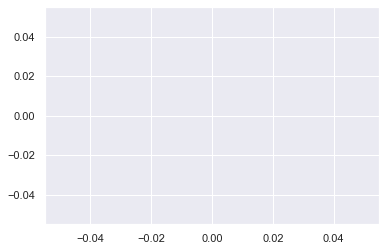

In [ ]:

plt.plot()

## Part 1

In [ ]:
data = pd.read_csv('populations.txt', sep='\t')
data.head(10)

,year,hare,lynx,carrot
0,1900,30000.0,4000.0,48300
1,1901,47200.0,6100.0,48200
2,1902,70200.0,9800.0,41500
3,1903,77400.0,35200.0,38200
4,1904,36300.0,59400.0,40600
5,1905,20600.0,41700.0,39800
6,1906,18100.0,19000.0,38600
7,1907,21400.0,13000.0,42300
8,1908,22000.0,8300.0,44500
9,1909,25400.0,9100.0,42100


Давайте для начала посмотрим как выглядит объект, который создает matplotlib И разберемся, как строить в нем графики. Первый вариант создания графика - plt.plot(), которому мы просто можем передать два аргумента - что положить на ось x, а что на y. Если у вас переменные в числовом формате, то без проблем получите линейный график (line plot)

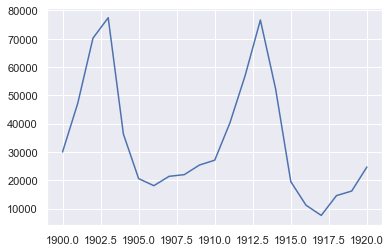

In [ ]:


plt.plot(data.year, data.hare) # первый аргумент - ось x, второй аргумент - ось y.
plt.axis('on')
plt.show()

Чтобы построить столбчатую диаграмму - меняем функцию plot на bar. 
Все виды графиков и функций можно найти в документации matplotlib 
https://matplotlib.org/api/pyplot_summary.html

<BarContainer object of 21 artists>

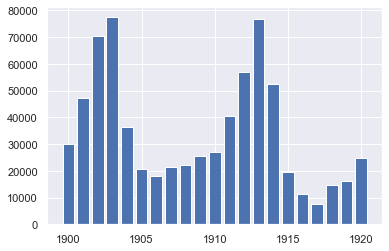

In [ ]:
plt.bar(data.year, data.hare) # первый аргумент - ось x, второй аргумент - ось y.

MPL очень большая библиотека, но по своей сути она состоит из небольшого количества базовых компонентов:
    ![image.png](attachment:image.png)

Figure - это контейнер самого верхнего уровня, та область на которой все нарисовано. Таких областей может быть несколько, каждая из которых может содержать несколько контейнеров Axes.

Axes - это та область на которой чаще всего и отражаются графики (данные в виде графиков), а так же все вспомогательные атрибуты (линии сетки, метки, указатели и т.д.). Часто, установка этой области сопровождается с вызовом subplot, который и помещает Axes на регулярную сетку. Поэтому, так же часто Axes и Subplot можно считать синонимами. Но с тем что это за сетка и как это размещение работает, давайте разберемся чуть ниже.

Каждая область Axes содержит XAxis и YAxis. Они содержат, деления, метки и прочие вспомогательные атрибуты. В Этом уроке мы будем контролировать тики, метки и пределы данных через другие механизмы, поэтому подробно рассматривать оси мы не будем.




plt.subplots(nrows, ncols) создает кортеж из двух элементов:

* Область Figure;
* Массив объектов NumPy, состоящий из двух строк и двух столбцов. Каждый элемент этого массива представляет собой отдельную область Axes, к которой можно обратиться по ее индексу в данном массиве.


Для дальнейшей работы с данными областями нам необходимо распаковать данный кортеж, что мы и делаем в строке:

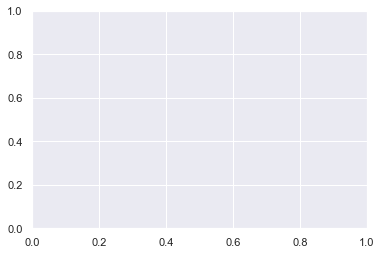

In [ ]:
fig, ax1 = plt.subplots(1, 1)

Теперь fig - это Figure, а axes - это массив NumPy, элементами которого являются объекты Axes. 

Переменная fig (или как вы ее назвали. Тут главное, что это первая переменная, которую вы определили) отвечает за график вцелом. Воспринимайте ее как файл, который хранит график как картинку.

Переменная ax (так, которую мы определяем второй) - это ось координат, на которой мы собственно строим график. Мы можем настраивать внешний вид этого объекта (потому что все элементы графика хранятся как раз в ней).






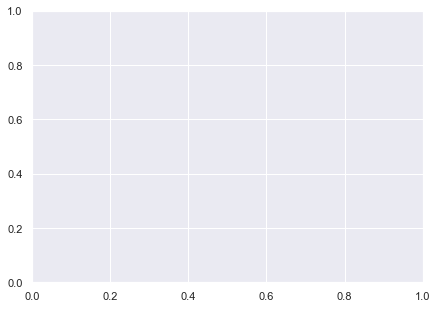

In [ ]:
fig, ax1 = plt.subplots(1,1, figsize=(7,5)) # создали объект из 1 ряда 1 колонки графика (что сюрприз - один график!)
                                           # Размер - по сути это размер нашего прямоугольника в неочевидных единицах. 
                                           # Какой размер удачный? экспериментируйте!

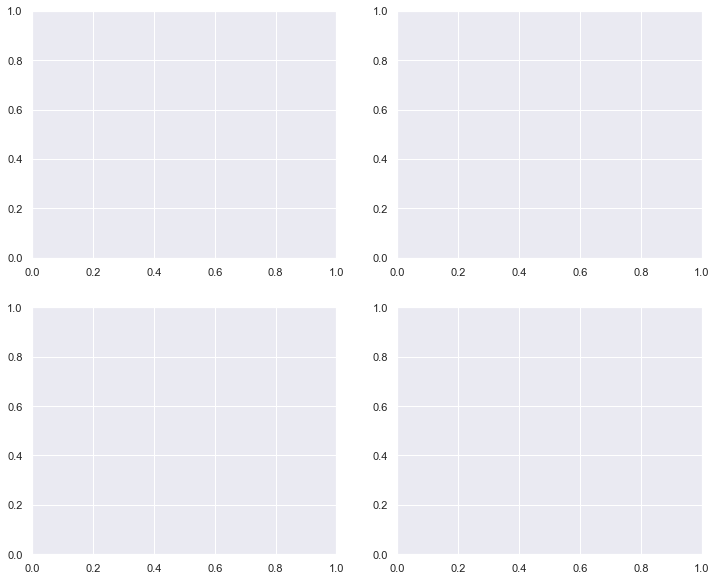

In [ ]:
fig, ax1 = plt.subplots(2, 2, figsize=(12,10))

In [ ]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

def offset_off(x):
    x.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))


Выше мы создали пустую шкалу координат. Давайте теперь попробуем наложить на нее график.

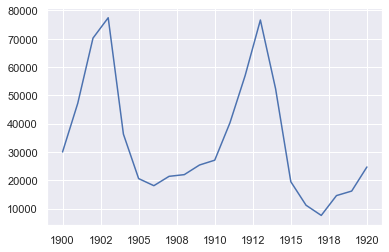

In [ ]:
fig, ax = plt.subplots(1,1)  #создаем переменную заново, чтобы вы точно стирали то, что в ней лежит на каждом шаге,
                                           # если вы захотите внести измения в код
ax.plot(data['year'], data['hare'])  #обратите внимание - график мы теперь строим как метод объекта ax. 
                                   # Ниже все модификации графика тоже применяем
offset_off(ax)

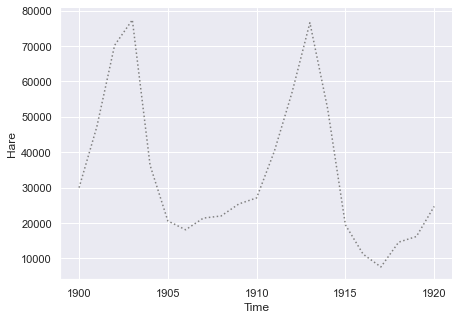

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(7,5)) 

# параметры самого графика (цвет линии, стиль и т.д.) определяем как параметры в методе plot()
# меняем цвет и стиль линии на пунктир. Matplotlib знает некоторые стандартные цвета, и их можно задать прямо словом
# так же можно передать hex цвет. Например, #8c92ac
ax.plot(data.year, data.hare, color = 'grey', ls = ':')  


# если вы обратили внимание, то в нашем самом первом графике шкала с годами сломамлась и стала float. Matplotlib принудительно 
# делает x непрерывной переменной для линейного графика. Мы хотим оставить шкалу год в целых числах.
ax.locator_params(integer=True) 

# называем шкалы x и y, выбираем размер шрифта.
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Hare', fontsize=12)

# делаем правую и верхнюю границу графика невидимыми
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# делаем засечки на шкалах x и y потоньше
ax.xaxis.set_tick_params(width=0.2)
ax.yaxis.set_tick_params(width=0.2)

# уменьшаем толщину оставших границ графика с помощью цикла (можно и без цикла отдельной строкой для каждой границы, как делали выше)
for spine in ['bottom','left']:
    ax.spines[spine].set_linewidth(0.2)

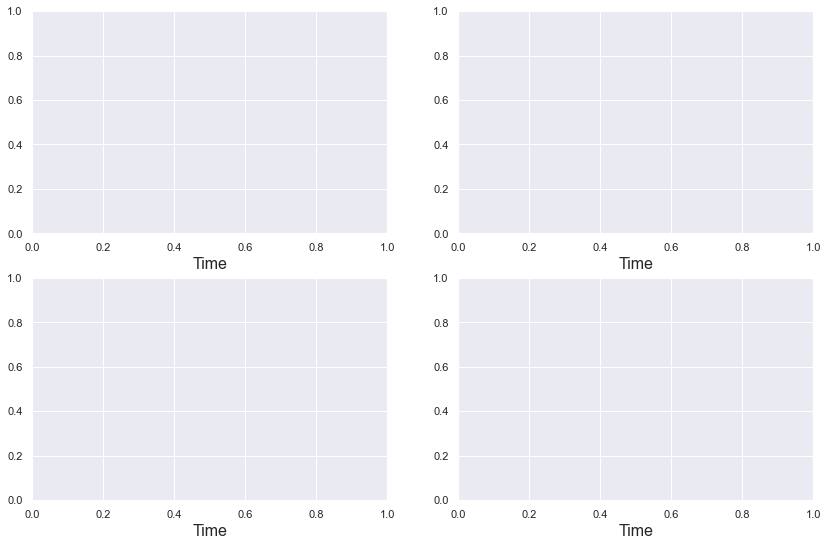

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(14,9))

for x in range(2):
    for y in range(2):
        ax[x][y].set_xlabel('Time', fontsize = 16)

### Задача 
Реализовать отображение графика с четырьмя подокнами.
На первых трех необходимо отобразить по отдельности популяции зайцев, рысей, моркови, и на четвертом отобразить их всех вместе. 

Проработать внешний вид графиков - data-ink ratio, согласованность, ясность - что есть что - , целостность и тд. Например, убедиться, что про каждый график известно, к чему он относится - зайцам, рысям или моркови. А так же убедиться, что для одних и тех же объектов используются одни и те же цвета.

TypeError: 'AxesSubplot' object is not subscriptable

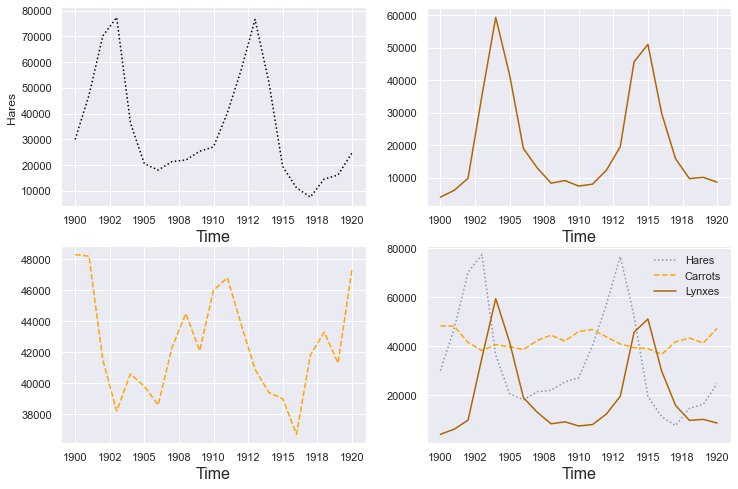

In [ ]:

fig, ax1=plt.subplots(2,2, figsize=(12,8))
ax1[0][0].plot(data.year,data.hare, color='black', ls=':')
ax1[0][0].set_ylabel('Hares')

ax1[0][0].spines['right'].set_visible(False)
ax1[0][0].spines['top'].set_visible(False)

ax1[0][1].plot(data['year'], data['lynx'], color='#b06500', ls = '-'); 

ax1[1][0].plot(data['year'], data['carrot'], color='#ffa500', ls = '--'); 


ax1[1][1].plot(data['year'], data['hare'], label = 'Hares', color='#8c92ac', ls = ':'); 
ax1[1][1].plot(data['year'], data['carrot'], label = 'Carrots', color='#ffa500', ls = '--');
ax1[1][1].plot(data['year'], data['lynx'], label = 'Lynxes', color='#b06500', ls = '-');


ax1[1][1].legend(loc=1,frameon=False)

for x in range(2):
    for y in range(2): 
        ax1[x][y].set_xlabel('Time', fontsize = 16)
        offset_off(ax1[x][y])
        
        for axis in ['bottom','left']:
            ax1[x][y].spines[axis].set_linewidth(1)
        
        


# вспомогательная сетка для главных делений


ax1[1][1].grid(axis = 'x')
ax1[1][1].spines['right'].set_visible(True)

ax1[1][1].set_frame_on(True)
ax1[1][1].spines['top'].set_visible(True)
ax[1][1].set_axisbelow(True)


### График можно сохранить в виде файла:

In [ ]:
fig.savefig("my_new_plot.png") 

### Доступные форматы, какие из них гарантируют сохранение лучшего качества?


Matplotlib может сгенерировать результат высокого качества в разных форматах, в т.ч. PNG, JPG, EPS, SVG, PDF. Для научных статей рекомендуем использовать PDF везде, где это возможно. 


EPS, PDF, SVG - векторные форматы, что означает возможность редактирования изображения в программах подобных Adobe illustrator с сохранением возможности редактирования отдельных элементов изображения - линий, точек, текста и пр.

PNG, JPG - растровые форматы, как фото. В программах редактирования изображений, например, Adobe Illustrator, обычно доступен только один объект для редактирования.

## Part 2

## Виды графиков

## Scatterplot

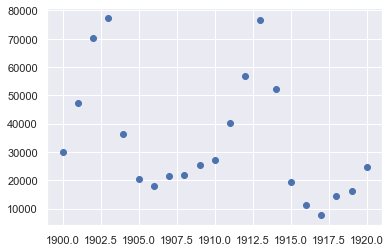

In [ ]:
fig, ax1= plt.subplots(1, 1)
ax1.plot(data['year'], data['hare'], 'o');

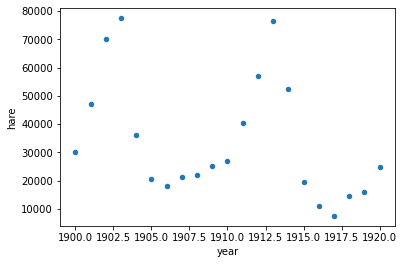

In [ ]:
data.plot.scatter(x='year', y='hare')

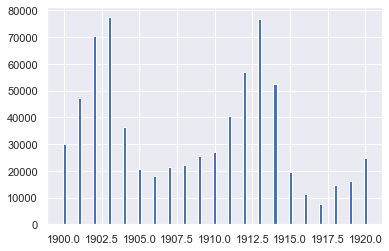

In [ ]:
fig, ax1= plt.subplots(1, 1)
width=0.2
ax1.bar(data['year'], data['hare'], width);  # параметр width изменяет ширину полосы


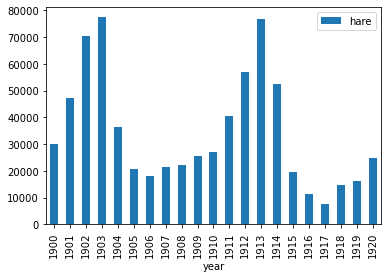

In [ ]:
data.plot.bar(x='year', y='hare')

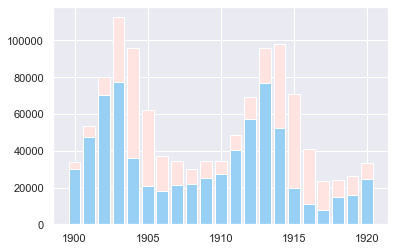

In [ ]:
fig, ax1= plt.subplots(1, 1)
width=0.8
ax1.bar(data['year'], data['hare'], width, color='#98cff4'); 
ax1.bar(data['year'], data['lynx'], width, color='#ffe4e1', bottom=data['hare']);  # Если указать bottom, полосы будут отрисованы над указанными

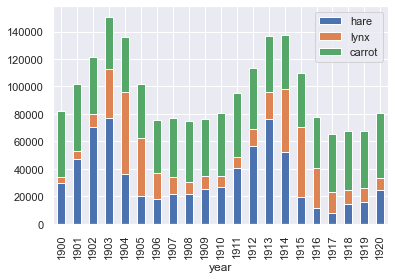

In [ ]:
data.plot.bar(x='year', y=['hare', 'lynx', 'carrot'], stacked=True)

## Area plots (диаграммы областей)

Text(0, 0.5, 'Area between \n y=0 and hares')

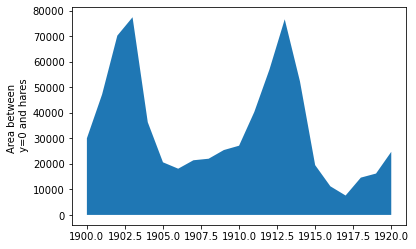

In [ ]:
fig, ax1= plt.subplots(1, 1)

ax1.fill_between(data['year'], 0, data['hare'])
ax1.set_ylabel('Area between \n y=0 and hares')

## Stacked Area plots (составные диаграммы областей)

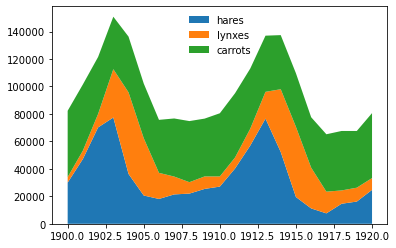

In [ ]:
fig, ax1= plt.subplots(1, 1)

ax1.stackplot(data['year'], data['hare'], data['lynx'], data['carrot'])
ax1.legend(['hares','lynxes','carrots'], frameon=False,loc='upper center');


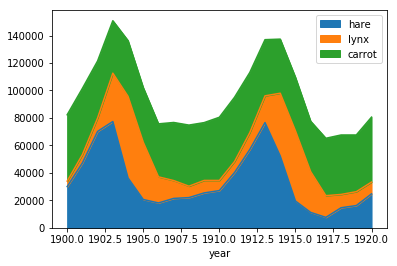

In [ ]:
data.plot.area(x='year')

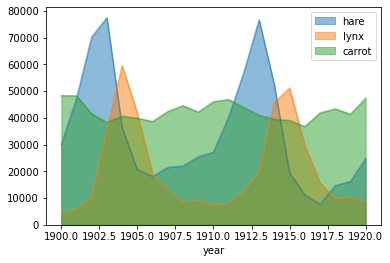

In [ ]:
data.plot.area(x='year', stacked=False)

## Grouped bar charts (сгруппированные столбчатые диаграммы)

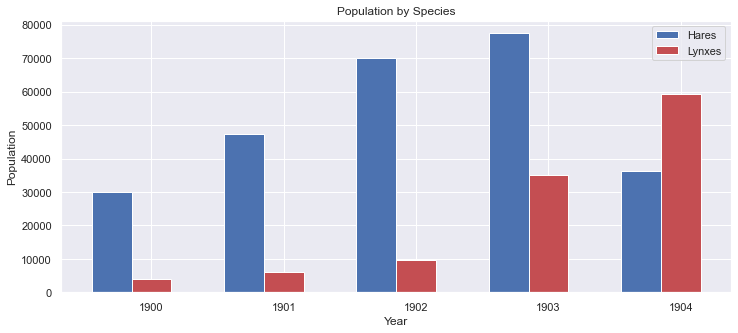

In [ ]:
hares5=data['hare'][0:5]
lynxes5=data['lynx'][0:5]
new_t5=data['year'][0:5]

fig, ax1= plt.subplots(1, 1, figsize=(12,5))
bar_width=0.3
hares_bar = ax1.bar(new_t5, hares5, bar_width,
                 color='b',
                 label='Hares')

lynxes_bar = ax1.bar(new_t5 + bar_width, lynxes5, bar_width,
                 color='r',
                 label='Lynxes')

ax1.set_xlabel('Year')
ax1.set_ylabel('Population')
plt.title('Population by Species')
plt.xticks(new_t5 + bar_width, ('1900', '1901', '1902', '1903', '1904'))
plt.legend();

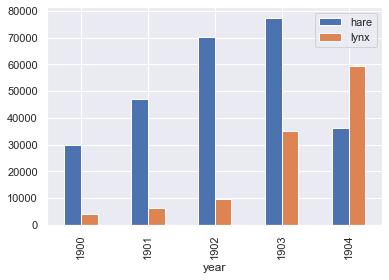

In [ ]:
data[data['year'] < 1905][['hare', 'lynx', 'year']].plot.bar(x='year', y=['hare', 'lynx'])

## Круговые диаграммы

([<matplotlib.patches.Wedge at 0x17e3daa7400>,
 [Text(1.0904760916949992, 0.1444364685306318, '1900'),
  Text(0.980446729538028, 0.498722578733092, '1901'),
  Text(0.6073331240230464, 0.9171403799116071, '1902'),
  Text(-0.06924303364955932, 1.0978184741982648, '1903'),
  Text(-0.586242417764804, 0.9307630351562513, '1904'),
  Text(-0.7981139527362793, 0.7569769603149572, '1905'),
  Text(-0.9145997940496929, 0.6111523678463983, '1906'),
  Text(-1.0063219994170602, 0.44420269414902297, '1907'),
  Text(-1.0722285049526807, 0.24561358506185935, '1908'),
  Text(-1.0998388167144333, 0.018830221671437074, '1909'),
  Text(-1.075064093035853, -0.23288880579581112, '1910'),
  Text(-0.960455519206975, -0.5362137592647734, '1911'),
  Text(-0.652059300755604, -0.8858999200237649, '1912'),
  Text(-0.05285165103481624, -1.0987295859231672, '1913'),
  Text(0.5444151232810112, -0.9558306196931137, '1914'),
  Text(0.8138849595104485, -0.7399941031404749, '1915'),
  Text(0.9059252766849986, -0.623938613

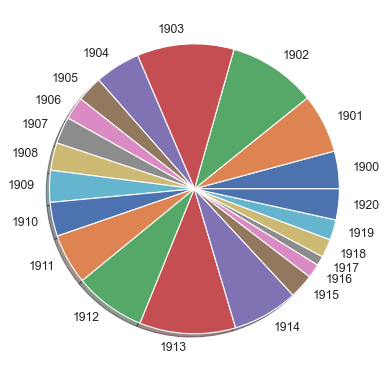

In [ ]:
plt.figure(figsize=(6,6), dpi=80)
plt.pie(data['hare'], labels=data['year'],shadow=True)

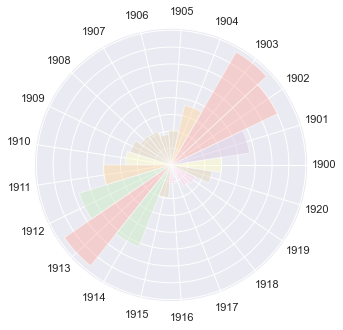

In [ ]:
fig = plt.figure()
ax = plt.axes([0.025,0.025,0.95,0.95], polar=True) # Это другой способ инициализации осей фигуры.

N = len(data['year'])
theta = np.arange(0.0, 2*np.pi, 2*np.pi/N) # нам нужно сопоставить наши временные данные с углами в круге
radii = data['hare'] 
mywidth = 0.3
bars = plt.bar(theta, radii, width=mywidth, bottom=0.0)

rmax=np.max(radii)

for r,bar in zip(radii, bars): 
    bar.set_facecolor( plt.cm.Pastel1_r(r/rmax)) #Мы используем здесь цветовую карту, которая принимает в качестве входных данных число от 0 до 1.
    bar.set_alpha(0.5) # Этим мы устанавливаем прозрачность сюжета. Попробуйте поставить равным 1
    
ax.set_xticks(np.pi/180*np.linspace(0,  360, N+1))
ax.set_xticklabels((data['year'].astype(int)))
ax.set_yticklabels([])
plt.show()


## Distribution Plots (диаграммы распределения)

In [ ]:
mu = 100.0
sigma1 = 15.0
A1 = np.random.normal(mu, sigma1, 10000) # Let's generate fake data, like IQ measurements

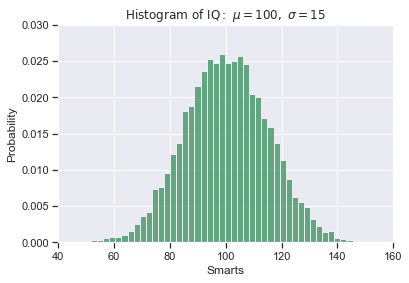

In [ ]:
fig, ax= plt.subplots(1, 1)

# the histogram of the data
n, bins, patches = plt.hist(A1, 50, density=1, facecolor='#368d5c', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

ax.spines["top"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

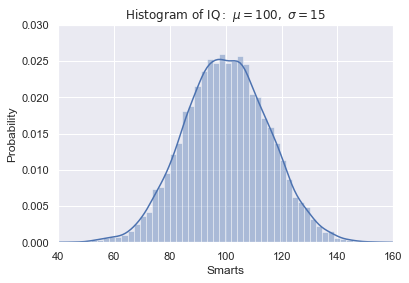

In [ ]:
# seaborn as sns
p = sns.distplot(A1)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

ax.spines["top"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


## Density plot (диаграмма плотности распределения)

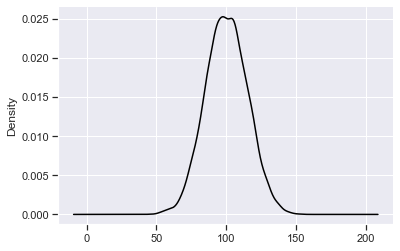

In [ ]:
df = pd.DataFrame(A1)
ax = df.plot(kind='density', color = 'black')
ax.spines["top"].set_visible(False)    
ax.spines["right"].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.legend().set_visible(False)


## Comparing distributions (сравнение распределений)

In [ ]:
mu = 100.0
sigma1 = 15.0
sigma2 = 25.0
A1 = np.random.normal(mu, sigma1, 10000) # IQ measurements of humans
A2 = np.random.normal(mu, sigma2, 10000) # IQ measurements of aliens

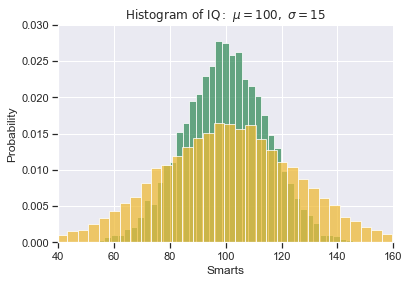

In [ ]:
fig, ax= plt.subplots(1, 1)

# the histogram of the data
n, bins, patches = plt.hist(A1, 50, density=1, facecolor='#368d5c', alpha=0.75)
n, bins, patches = plt.hist(A2, 50, density=1, facecolor='#efbb38', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

ax.spines["top"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

## Boxplots (ящик с усами)

In [1]:
fig, ax= plt.subplots(1, 1)
ax.boxplot([A1, A2]);
plt.setp(ax, xticklabels=['A1', 'A2']);

NameError: ignored

In [ ]:
fig, ax= plt.subplots(1, 1)
bp=ax.boxplot([A1, A2]);
plt.setp(ax, xticklabels=['A1', 'A2'])
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], marker='o', MarkerFaceColor='red');

In [ ]:
mu = 100.0
sigma1 = 15.0
sigma2 = 25.0
A1 = np.random.normal(mu, sigma1, 10000) # IQ measurements of humans
A2 = np.concatenate((np.random.normal(mu-50, sigma1, 10000), np.random.normal(mu+50, sigma2, 10000)), axis=0) # IQ measurements of aliens

In [ ]:
fig, ax= plt.subplots(1, 1)
ax.boxplot([A1, A2])
plt.setp(ax, xticklabels=['A1', 'A2']);

In [ ]:
fig, ax= plt.subplots(1, 1)
ax.violinplot([A1, A2], showmeans=False, showmedians=True);

## Part 3

# Мультивариативный график рассеяния (multivariate scatter plot): преступления в США

Сейчас будем работать с наборам данных, который содержит информацию о количестве преступлений в штатах США

In [ ]:
crimes = pd.read_csv('crimeRatesByState2005.tsv', sep='\t')  # тут разделитель - тоже табуляция
crimes.head()

,state,murder,Forcible_rate,Robbery,aggravated_assult,burglary,larceny_theft,motor_vehicle_theft,population
0,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4627851
1,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,686293
2,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,6500180
3,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2855390
4,California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8,36756666


Давайте начнем с графика с двумя переменным. Тут все просто - непрерывная переменная по x, непрерывная переменная по y: а точка на пересечении значений x и y - место нашего штата в этой системе  координат. Давайте для начала построим график для убийств и ограблений. График рассеяния можно использовать и для категориальных переменных - посмотрим на другом примере.

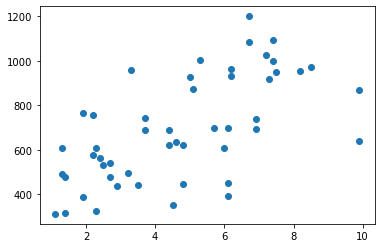

In [ ]:
fig, ax = plt.subplots()  # если нужно создать один график, то можем не указывать количество в аргументах
ax.scatter(crimes['murder'], crimes['burglary'])  # вместо метода plot используем scatter

Попробуйте проинтерпретировать график выше. 

Мульвариативный график - это такой график, из которого мы можем считать значения для более чем двух переменных. Самый простой способ закодировать дополнительную информацию - цыет и размер точки. Давайте добавим значение переменной population (размер населения штата) на график как размер точки.

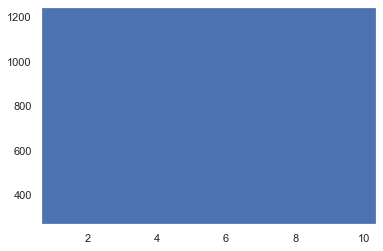

In [ ]:
fig, ax = plt.subplots()

# добавляем параметр s (size) и говорим, какая переменная будет за него отвечать
ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population'])  


Размер населения такой большой, что точка захватила всю область координат. Давайте попробуем нашу переменную масштабировать - нам же важны относительные размеры штатов относительно друг друга, а не абсолютные значения. Значения маштабирования тоже выбираем экспериментально: то, что лучше выглядит и более информативно.

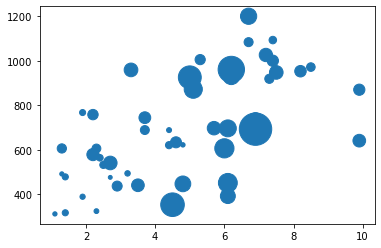

In [ ]:
fig, ax = plt.subplots()
ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']/35000)

Класс, только некоторые точки слились. Давайте добавим параметр прозрачности, чтобы было видно, где они накладываются друг на друга.

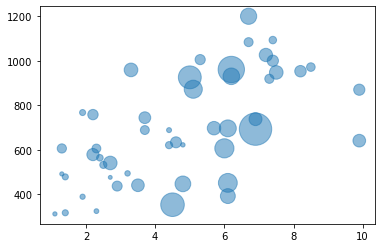

In [ ]:
fig, ax = plt.subplots()
ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']/35000, alpha = 0.5) # параметр alpha задает прозрачность точки от 0 до 1

Давайте попробуем проинтерпретировать этот график. А потом добавим еще какую-нибудь переменную в виде цвета.

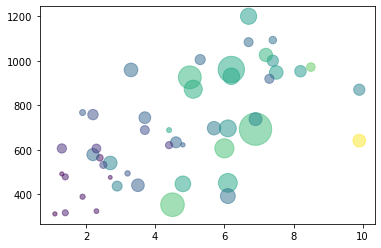

In [ ]:
fig, ax = plt.subplots()
ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']/35000, alpha = 0.5, 
           c = crimes['Robbery']) # задаем новый аргумент c (color) и присваиваем ему значение переменной

Осталось узнать, что значит какой цвет. Для этого нужно сохранить график в переменную и передать ее как аргумент функции colorbar().
Также можем поменять цветовую шкалу с помощью аргумента cmap (какие цветовые картыесть в matplotlib? Гуглим документацию!).

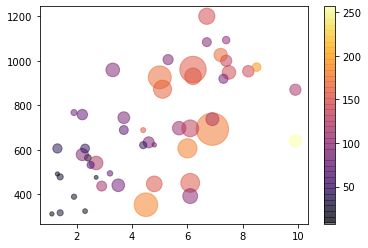

In [ ]:
fig, ax = plt.subplots()
color_graph = ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']/35000, alpha = 0.5, cmap = 'inferno',
           c = crimes['Robbery'])
plt.colorbar(color_graph)

Проинтерпретируйте

**Для самостоятельного изучения: сделаем симпатичней и подпишем штаты**

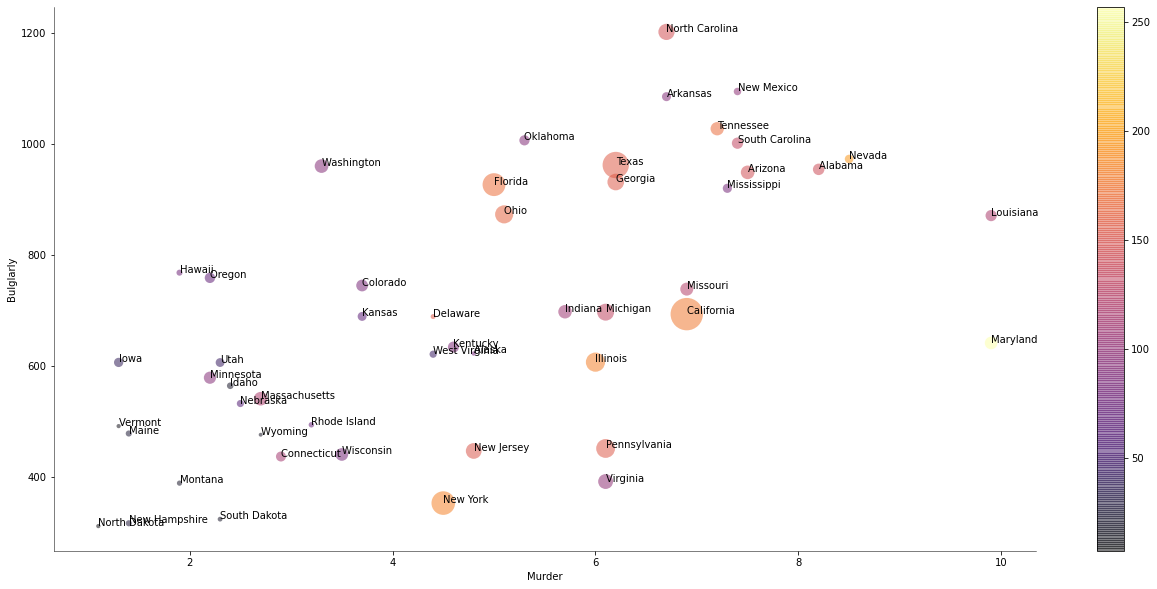

In [ ]:
fig, ax = plt.subplots(figsize = (22,10))

color_graph = ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']/35000, c = crimes['Robbery'], cmap = 'inferno', alpha = 0.5, linewidth = 0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

ax.set_xlabel('Murder', fontsize = 10)
ax.set_ylabel('Bulglarly', fontsize = 10)

for i, state in enumerate(crimes['state']):  # с помощью enumerate создаем из колонок с названиями штатов объект кортежей вида индекс - название штата.
    ax.annotate(state, (crimes['murder'][i], crimes['burglary'][i]), fontsize = 10) # используем метод annotate, которому говорим, что нужно брать имя штата
                                                                                    # из кортежа, который создали с помощью enumerate, а координаты подписи задаем через
                                                                                    # значения наших переменных x и y для нужного индекса из объекта enumerate (обращается к нужному
                                                                                    # ряду в датафрейме)
                
plt.colorbar(color_graph)
plt.savefig('crimes.png')  # сохраняем

In [ ]:
# смотрим что внутри объекта enumerate()
list(enumerate(crimes['state']))

[(0, 'Alabama '),
 (1, 'Alaska '),
 (2, 'Arizona '),
 (3, 'Arkansas'),
 (4, 'California '),
 (5, 'Colorado '),
 (6, 'Connecticut '),
 (7, 'Delaware '),
 (8, 'Florida '),
 (9, 'Georgia '),
 (10, 'Hawaii '),
 (11, 'Idaho '),
 (12, 'Illinois '),
 (13, 'Indiana '),
 (14, 'Iowa '),
 (15, 'Kansas  '),
 (16, 'Kentucky  '),
 (17, 'Louisiana '),
 (18, 'Maine '),
 (19, 'Maryland '),
 (20, 'Massachusetts'),
 (21, 'Michigan'),
 (22, 'Minnesota '),
 (23, 'Mississippi '),
 (24, 'Missouri '),
 (25, 'Montana  '),
 (26, 'Nebraska '),
 (27, 'Nevada '),
 (28, 'New Hampshire '),
 (29, 'New Jersey'),
 (30, 'New Mexico '),
 (31, 'New York'),
 (32, 'North Carolina '),
 (33, 'North Dakota '),
 (34, 'Ohio '),
 (35, 'Oklahoma '),
 (36, 'Oregon '),
 (37, 'Pennsylvania'),
 (38, 'Rhode Island '),
 (39, 'South Carolina '),
 (40, 'South Dakota '),
 (41, 'Tennessee '),
 (42, 'Texas '),
 (43, 'Utah'),
 (44, 'Vermont '),
 (45, 'Virginia '),
 (46, 'Washington '),
 (47, 'West Virginia '),
 (48, 'Wisconsin '),
 (49, 'Wyom

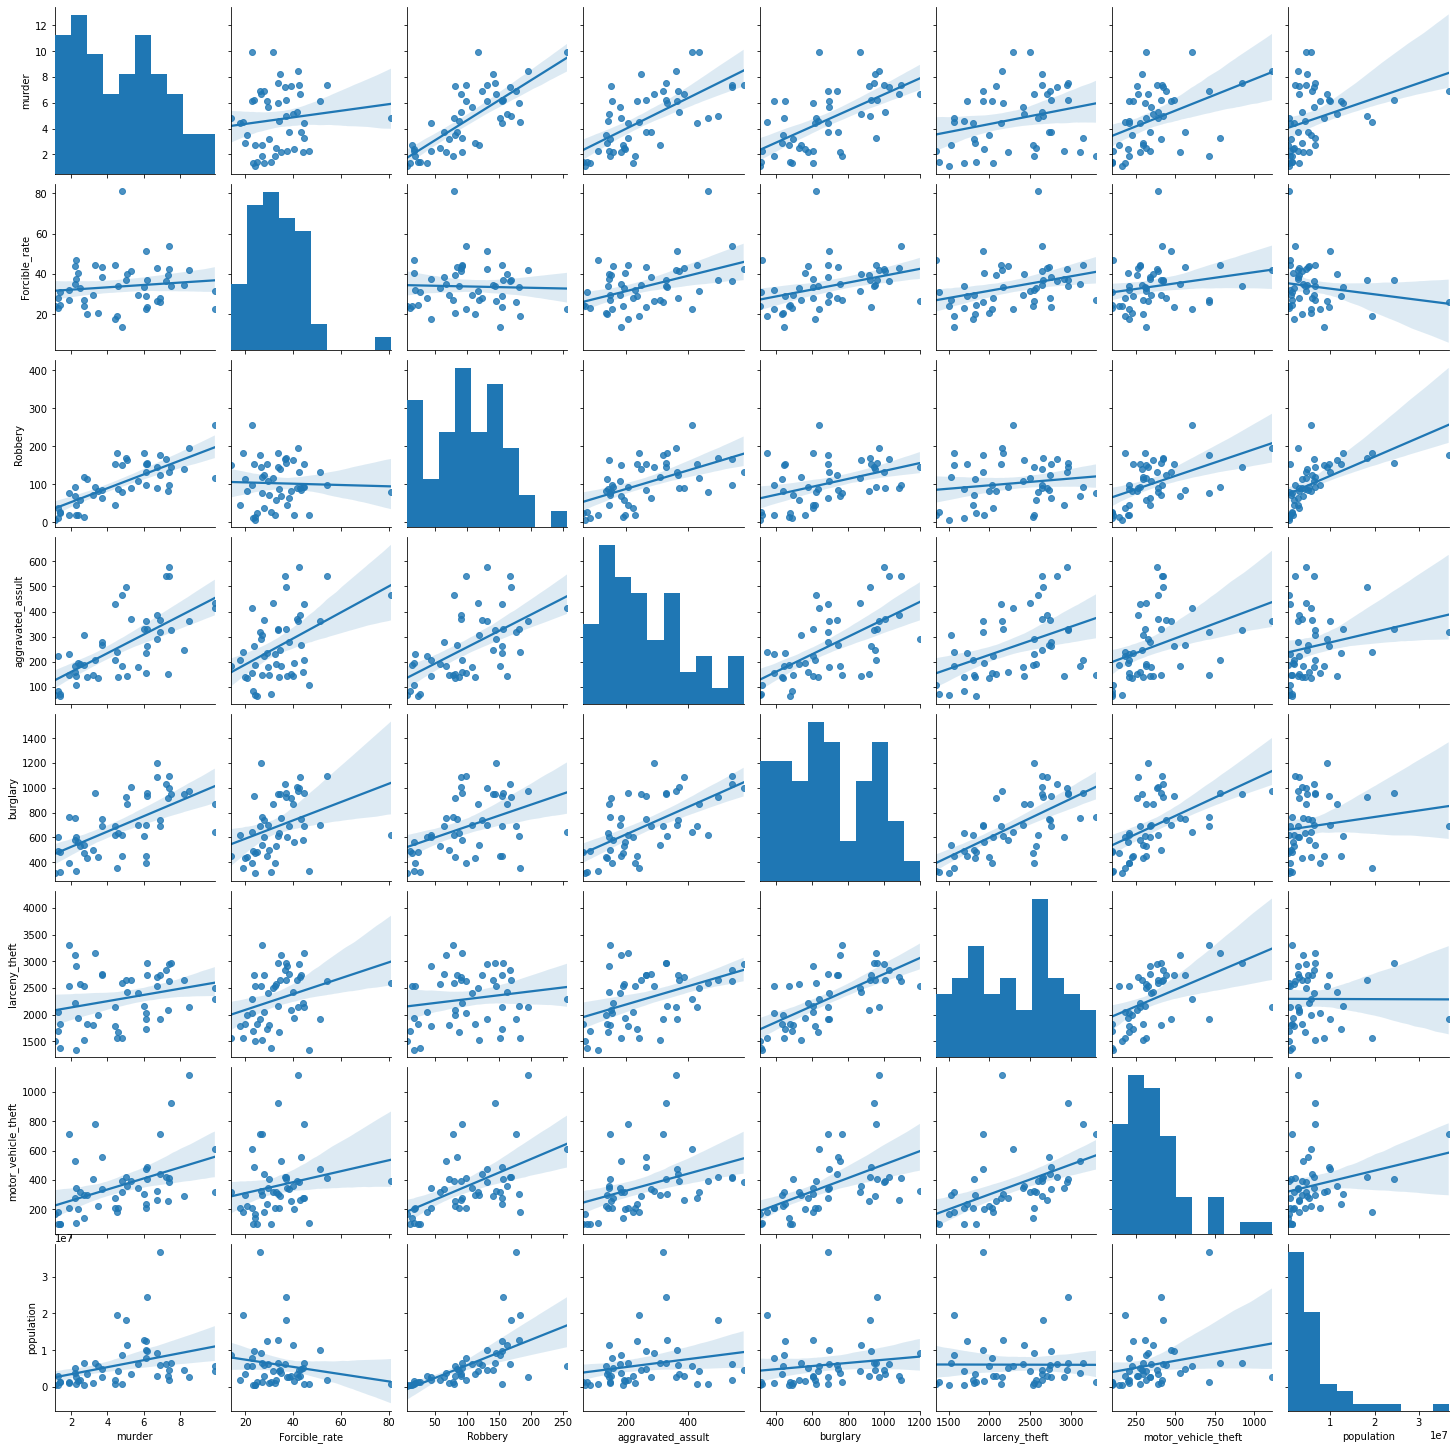

In [ ]:

sns.pairplot(df, kind="reg")

## Part 4. Самостоятельно . Графики для категориальных переменных: столбчатые диаграммы, совмещенные столбчатые диаграммы, график рассеяния для категориальных переменных

Тут будем работать по мотивам вот этого блокнота.

https://nbviewer.jupyter.org/github/yaph/ipython-notebooks/blob/master/movie-body-counts.ipynb

Бдуем работать с датасетом, который подсчитывает количество смертей в фильмах (меотодологию сбора данных можно посмотреть по ссылке выше). Несколько графиков мы рассмотрим на паре, остальные можно изучить самостоятельно (хинт: это может помочь с домашней работой).

Очень часто для того, чтобы получить тот график, который хотим - нужно сделать правильную группировку. С этим тоже тут поработаем.



In [ ]:
movies =  pd . read_csv ( 'http://files.figshare.com/1332945/film_death_counts.csv' )

In [ ]:
movies = pd.read_csv('bodycount_Directors_Genra.csv', index_col=0) # скажем, что индекс лежит в первой колонке
movies.head()

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating
0,24 Hour Party People,2002,7,R,Biography|Comedy|Drama|Music,Michael Winterbottom,117,7.3
1,28 Days Later,2002,53,R,Horror|Sci-Fi|Thriller,Danny Boyle,113,7.6
2,28 Weeks Later,2007,212,R,Horror|Sci-Fi|Thriller,Juan Carlos Fresnadillo,100,7.0
3,30 Days of Night,2007,67,R,Horror|Thriller,David Slade,113,6.6
4,300,2007,600,R,Action|Fantasy|History|War,Zack Snyder,117,7.7


Обратите внимание, что мы работаем с таким датасетом, где один и тот же фильм может встречаться несколько раз (это связано с тем, что он может относиться к нескольким жанрам или имеет несколько режиссеров - эта информация добавляет дополнительные ряды). Поэтому при некоторых агрегациях будем выкидывать дубликаты из колонки Film, чтобы не было задвоения.

In [ ]:
movies.shape # размер оригинального датафрейма

(1682, 10)

In [ ]:
movies.drop_duplicates('Film').shape # размер датафрейма для уникальных фильмов

(537, 10)

Давайте сгруппируем фильмы по году и суммируем значения для того, чтобы построить столбчатый график.

## Агрегация по годам. Столбчатый график

In [ ]:
movies_year = movies.drop_duplicates('Film').groupby('Year').sum()

In [ ]:
movies_year.head()

,Body_Count,Length_Minutes,IMDB_Rating,Film_Count,Body_Count_Min
Year,,,,,
1949,4.0,104,8.4,1,0.038462
1954,115.0,300,16.4,2,0.851644
1957,67.0,88,8.5,1,0.761364
1959,7.0,79,3.9,1,0.088608
1960,55.0,128,7.8,1,0.429688


Text(0.5, 1.0, 'Total Body Count')

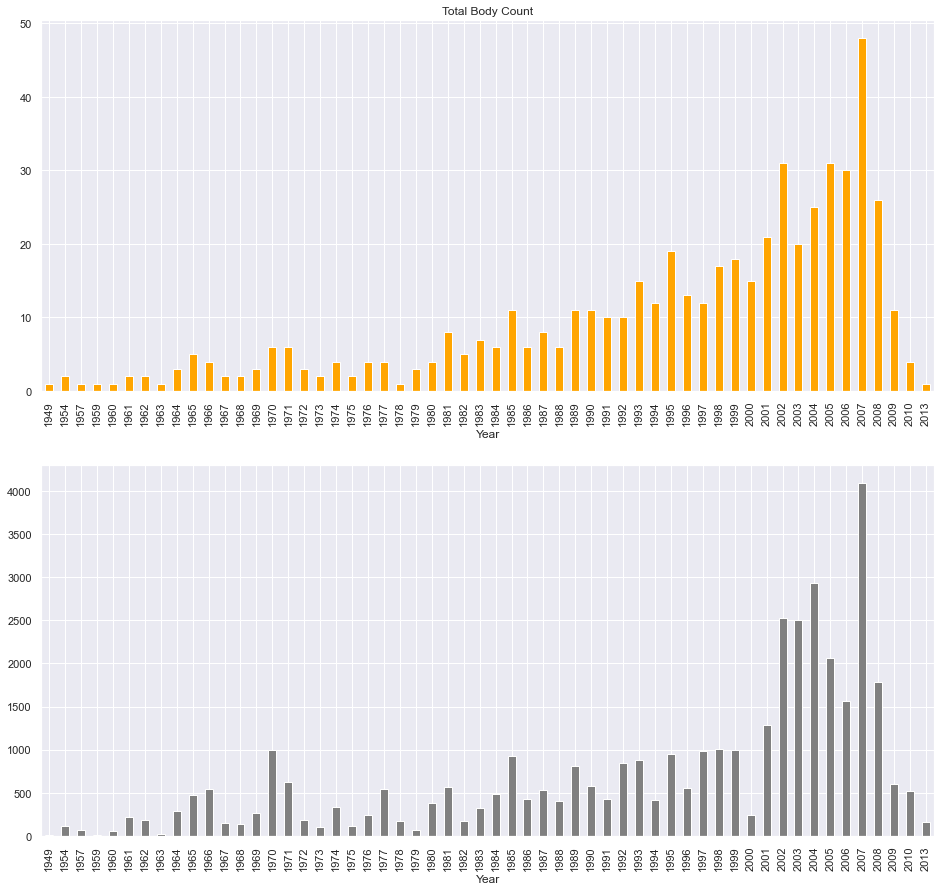

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(16, 15))


movies_year['Film_Count'].plot(kind='bar', ax=ax[0], color = '#ffa500')
ax[0].set_title('Film Count')

movies_year['Body_Count'].plot(kind='bar', ax=ax[1], color = 'grey')
ax[1].set_title('Total Body Count')

## Агрегация по фильмам. Сортировка по значения. Горизонтальный столбчатый график

Сейчас мы сгруппируем датасет по фильмам, найдем 10 самых жестоких и визуализируем их.

In [ ]:
movies_film = movies.drop_duplicates('Film').set_index('Film') # агрегируем и делаем индексом название фильма, так как индекс станет шкалой
movies_film.head()

,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating,Film_Count,Body_Count_Min
Film,,,,,,,,,
24 Hour Party People,2002,7.0,R,Biography,Michael Winterbottom,117,7.3,1,0.059829
28 Days Later,2002,53.0,R,Horror,Danny Boyle,113,7.6,1,0.469027
28 Weeks Later,2007,212.0,R,Horror,Juan Carlos Fresnadillo,100,7.0,1,2.120000
30 Days of Night,2007,67.0,R,Horror,David Slade,113,6.6,1,0.592920
300,2007,600.0,R,Action,Zack Snyder,117,7.7,1,5.128205


In [ ]:
movies_film.sort_values(by=['Body_Count'])['Body_Count'].tail(10) # сортируем и берем 10 последних значений

Film
King Arthur                              378.0
Windtalkers                              389.0
Lord of the Rings: Two Towers            468.0
A Fistful of Dynamite                    471.0
The Last Samurai                         558.0
Troy                                     572.0
Tae Guk Gi: The Brotherhood of War       590.0
300                                      600.0
Kingdom of Heaven                        610.0
Lord of the Rings: Return of the King    836.0
Name: Body_Count, dtype: float64

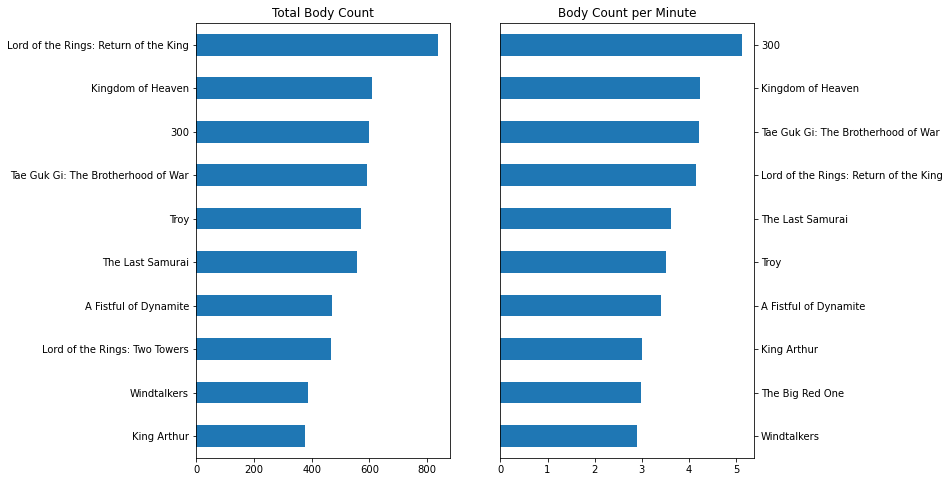

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

# график для количества убитых людей в фильме. Горизонтальный график делаем параметром barh (bar horizontal)
movies_film.sort_values(by=['Body_Count'])['Body_Count'].tail(10).plot(kind='barh', ax=ax[0]) 
ax[0].set_title('Total Body Count')

movies_film.sort_values(by=['Body_Count_Min'])['Body_Count_Min'].tail(10).plot(kind='barh', ax=ax[1]) # для количества убитых людей на минуту фильма

ax[1].set_title('Body Count per Minute')
ax[1].yaxis.set_ticks_position('right')

for i in range(2):
    ax[i].set_ylabel('', visible=False) # убираем подпись к шкале, которая генерируется автоматически


# Рейтинги: график рассеяния для категориальной переменной

Графики рассеяния для категориальных переменных тоже имеют место быть. В данном случае у нас будет категориальная переменная по x (буквенный рейтинг фильма). Такой график помогает нам увидеть разброс значений в рамках категорий, а также некоторые корелляции и зависимости. Не забывайте только добавлять прозрачность, потому что в случае категориальных переменных большое количество точек может накладываться друг на друга.


In [ ]:
movies['MPAA_Rating'].value_counts()

R           1039
PG-13        383
PG           114
Unrated       70
Approved      28
GP            13
M             13
G             11
X             10
NR             1
Name: MPAA_Rating, dtype: int64

**Упражнение:**
    
Постройте график рассеяния для MPAA_Rating по шкале x, Body_Count_Min по y и в качестве размера точки возьмите абсолютное значение Body Count.

Text(0, 0.5, 'Body count per minute')

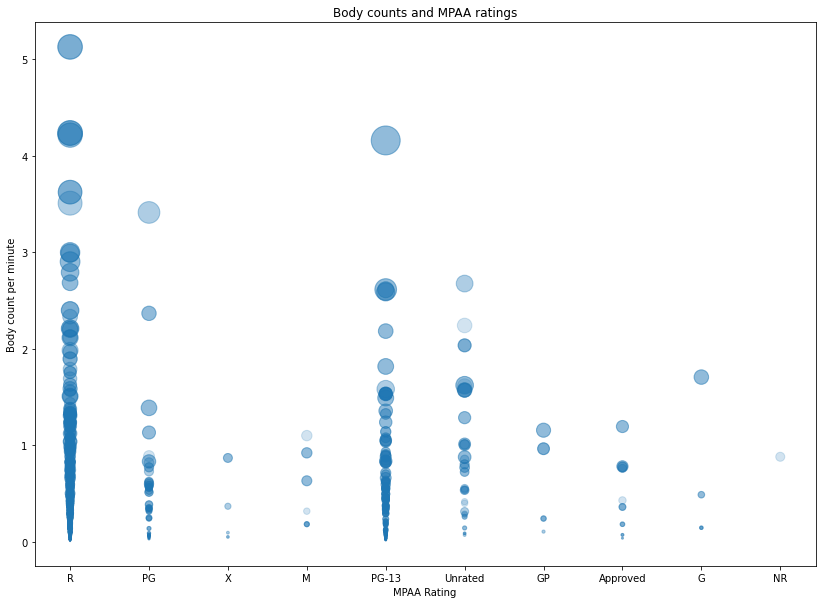

In [ ]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.scatter(movies['MPAA_Rating'], movies['Body_Count_Min'], s=movies['Body_Count'], alpha=.2)
ax.set_title('Body counts and MPAA ratings')
ax.set_xlabel('MPAA Rating')
ax.set_ylabel('Body count per minute')


Проинтерпретируйте график.

Так же для работы с такими данными могут понадобиться такие графики, как swarmplot (например, есть в библиотеке seaborn). В таком графике столбец переменной немного расширен, что позволяет точкам немного распределиться по горизонтали.

https://seaborn.pydata.org/generated/seaborn.swarmplot.html

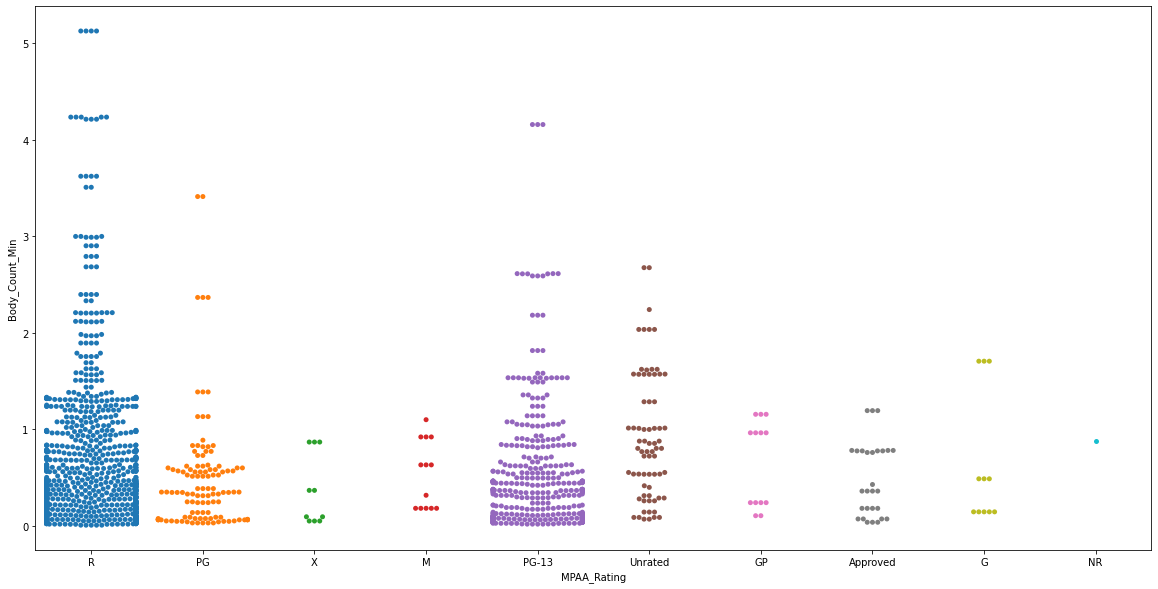

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(1,1, figsize = (20,10))

sns.swarmplot(movies['MPAA_Rating'], movies['Body_Count_Min'])

# Рейтинги: график рассеяния, подписываем фильмы

Давайте построим график рассеяния для рейтинга imbd и body count per minute. А так же подпишем значения для трех самых жестоких фильмов.

In [ ]:
movies.drop_duplicates('Film').sort_values(by=['Body_Count'], ascending=False).head(3) # находим три самых жестоких фильма


,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating,Film_Count,Body_Count_Min
740,Lord of the Rings: Return of the King,2003,836.0,PG-13,Action,Peter Jackson,201,8.9,1,4.159204
665,Kingdom of Heaven,2005,610.0,R,Action,Ridley Scott,144,7.1,1,4.236111
12,300,2007,600.0,R,Action,Zack Snyder,117,7.7,1,5.128205


In [ ]:
bc_top = movies.drop_duplicates('Film').sort_values(by=['Body_Count'], ascending=False).head(3) # сохраним датафрейм из трех фильмов
annotations = []
for r in range(len(bc_top)): # сделаем цикл, который сложит нам в список тройки "название фильма - рейтинг - количество убийств на минуту фильма"
    annotations.append([bc_top['Film'].iloc[r], bc_top['IMDB_Rating'].iloc[r], bc_top['Body_Count_Min'].iloc[r]])
annotations

[['Lord of the Rings: Return of the King', 8.9, 4.159203980099503],
 ['Kingdom of Heaven', 7.1, 4.236111111111111],
 ['300', 7.7, 5.128205128205129]]

**Упражнение:**

Сделайте график рассеяния для рейтинга imdb по x, body count per minute для y, и body count для размера точки. 

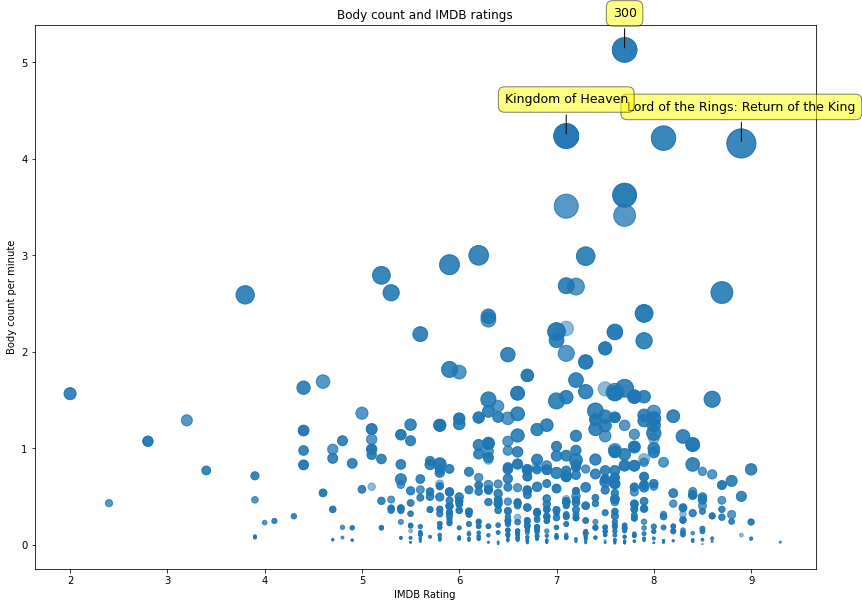

In [ ]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.scatter(movies['IMDB_Rating'], movies['Body_Count_Min'], s=movies['Body_Count'], alpha=.5)
ax.set_title('Body count and IMDB ratings')
ax.set_xlabel('IMDB Rating')
ax.set_ylabel('Body count per minute')

for annotation, x, y in annotations: # идем в наш список с тремя фильмами и итерируемся по нему
    plt.annotate(   # функция, которая подпишет наблюдения в нашем графики
        annotation, # обращаемся к названию фильма
        xy=(x, y),  # задаем координаты точек
        xytext=(0, 30), # задаем координаты текста (смещение на 30 единиц вверх по y)
        textcoords='offset points',
        ha='center',
        va='bottom',
        size=12.5,
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle='-'))


## Делаем совмещенные столбчатые диграммы из агрегированных данных

In [ ]:
bc = pd.DataFrame({'mean_value': movies.drop_duplicates('Film').groupby('Year')['Body_Count'].mean(),
                        'median_value': movies.drop_duplicates('Film').groupby('Year')['Body_Count'].median()})

bc_min = pd.DataFrame({'mean_value': movies.drop_duplicates('Film').groupby('Year')['Body_Count_Min'].mean(),
                           'median_value': movies.drop_duplicates('Film').groupby('Year')['Body_Count_Min'].median()})

In [ ]:
bc.head()

,mean_value,median_value
Year,,
1949,4.0,4.0
1954,57.5,57.5
1957,67.0,67.0
1959,7.0,7.0
1960,55.0,55.0


In [ ]:
bc_min.head()

,mean_value,median_value
Year,,
1949,0.038462,0.038462
1954,0.425822,0.425822
1957,0.761364,0.761364
1959,0.088608,0.088608
1960,0.429688,0.429688


Text(0.5,1,'Body Count by Minute')

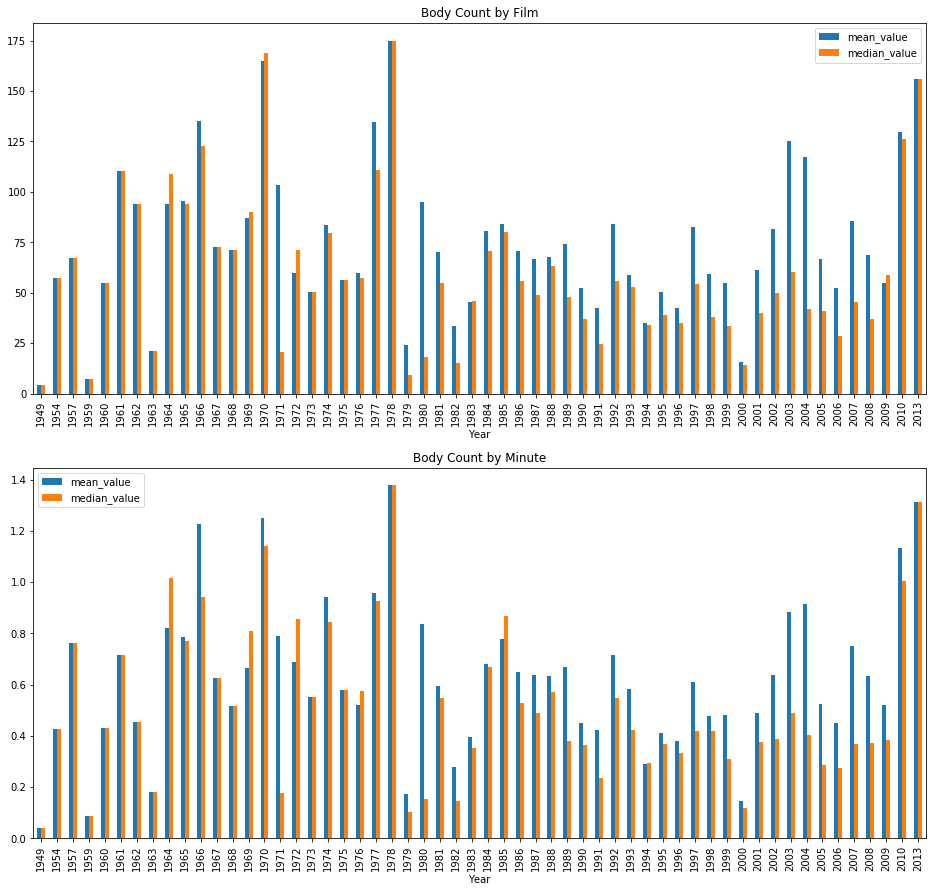

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(16, 15))

bc.plot(kind='bar', ax=ax[0])
ax[0].set_title('Body Count by Film')

bc_min.plot(kind='bar', ax=ax[1])
ax[1].set_title('Body Count by Minute')
  

## Упражнение: по аналогии с фильмами найдите самых жестоких режиссеров (тут уже не выкидываем дубликаты)

In [ ]:
movies_dir = movies.groupby('Director').sum().sort_values(by=['Body_Count']).tail(10)

NameError: ignored

In [ ]:
movies_dir

NameError: ignored

In [ ]:
movies_dir_mean = movies_dir.groupby('Director').mean().sort_values(by=['Body_Count_Min']).tail(10)
movies_dir_mean

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

movies_dir['Body_Count'].plot(kind='barh', ax=ax[0])
ax[0].set_title('Total Body Count')

movies_dir_mean['Body_Count_Min'].plot(kind='barh', ax=ax[1])
ax[1].set_title('Body Count per Minute')
ax[1].yaxis.set_ticks_position('right')

for i in range(2):
    ax[i].set_ylabel('', visible=False)

## Агрегация по жанрам (подсчет абсолютных значений и самые высокие средние значения)

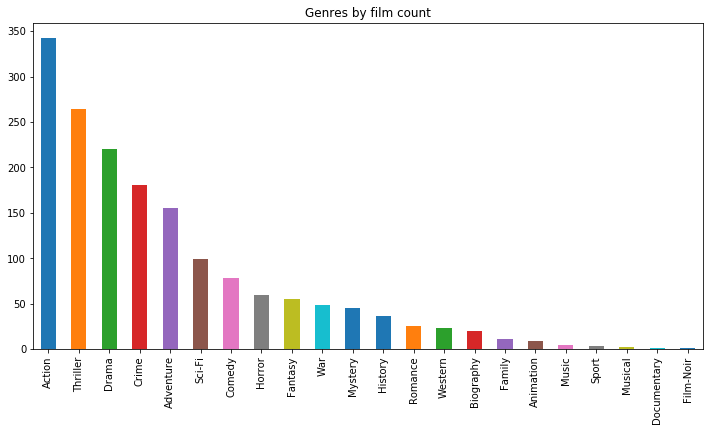

In [ ]:
movies['Genre'].value_counts().plot(kind='bar', figsize=(12, 6), title='Genres by film count')


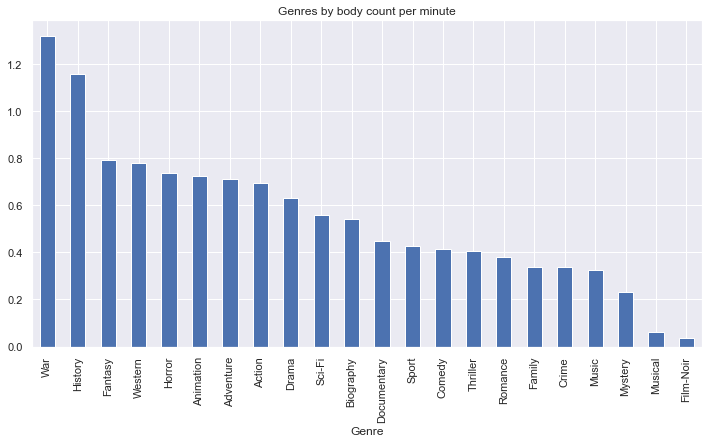

In [ ]:
movies.groupby('Genre').mean().sort_values(by=['Body_Count_Min'], ascending=False)['Body_Count_Min'].plot(kind='bar', figsize=(12, 6), title='Genres by body count per minute')